## Importando o dataset de digitos

In [156]:
from sklearn import datasets

digitos = datasets.load_digits()
digitos

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

## Visualizando os digitos

<Figure size 432x288 with 0 Axes>

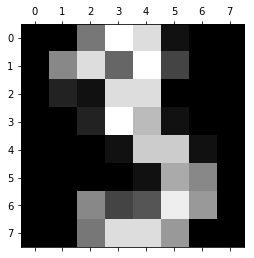

In [16]:
import matplotlib.pyplot as plt 

plt.gray() 
plt.matshow(digitos.images[3]) 
plt.show() 

In [20]:
digitos.data.max()

16.0

## Normalizando os digitos

In [23]:
digitos.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [0]:
dados_digitos = digitos.data / digitos.data.max()

In [52]:
dados_digitos

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

## Separando 90% para treinar

In [53]:
len(dados_digitos)

1797

In [54]:
.9*1797

1617.3

In [57]:
numero_amostras = len(dados_digitos)
numero_amostras

1797

In [56]:
X_treino = dados_digitos[:int(.9 * numero_amostras)]
len(X_treino)

1617

In [0]:
digitos_alvo = digitos.target

In [25]:
digitos_alvo

array([0, 1, 2, ..., 8, 9, 8])

In [50]:
len(digitos_alvo)

1797

In [0]:
y_treino = digitos_alvo[:int(.9 * numero_amostras)]

In [49]:
len(y_treino)

1617

## Separando 10% para testar

In [59]:
X_teste = dados_digitos[int(.9 * n_samples):]
len(X_teste)

180

In [93]:
X_teste

array([[0.    , 0.    , 0.3125, ..., 0.0625, 0.    , 0.    ],
       [0.    , 0.    , 0.375 , ..., 0.5625, 0.375 , 0.125 ],
       [0.    , 0.    , 0.    , ..., 0.375 , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [60]:
y_teste = digitos_alvo[int(.9 * n_samples):]
len(y_teste)

180

In [61]:
1617+180

1797

## Usando regressão logística

In [0]:
from sklearn import linear_model

regressao = linear_model.LogisticRegression()

In [80]:
regressao.fit(X_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
regressao = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')

In [111]:
regressao

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
regressao.fit(X_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicao_regressao = regressao.predict(X_teste)

In [144]:
predicao_regressao[1]

2

In [145]:
y_teste[1]

2

In [143]:
predicao_regressao[11]

9

In [142]:
y_teste[11]

4

In [146]:
regressao.score(X_teste, y_teste)

0.9333333333333333

In [149]:
print('Resultado regressão logística: %f' % regressao.fit(X_treino, y_treino).score(X_teste, y_teste))

Resultado regressão logística: 0.933333


In [0]:
resultado_regressao = regressao.fit(X_treino, y_treino).score(X_teste, y_teste)

In [151]:
print('LogisticRegression score: %f' % resultado_regressao)

LogisticRegression score: 0.933333


## Usando KNN

In [0]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()

In [63]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [107]:
predicoes_knn = knn.predict(X_teste)
predicoes_knn[1]

2

In [109]:
numero_predito = y_teste[1]
numero_predito

2

In [65]:
knn.score(X_teste, y_teste)

0.9611111111111111

In [154]:
resultado_knn = knn.fit(X_treino, y_treino).score(X_teste, y_teste)
resultado_knn

0.9611111111111111

In [78]:
print('Resultado KNN: %f' % resultado_knn)

Resultado KNN: 0.961111
